<a href="https://colab.research.google.com/github/schwallergroup/ai4chem_course/blob/main/notebooks/01 - Basics/01c_python_essentials_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python essentials - Plotting data

## Install dependencies

We will first have to make sure that the required libraries are installed.

We will first install `matplotlib` which is widelly used for creating plots. we To do so we need to run the command:  `pip install matplotlib`.
Because this is a shell command, you have to run it with an `!`.

In [1]:
!pip install matplotlib

Similar for `seaborn` which another library for plotting data: run `!pip install seaborn`.

In [2]:
!pip install seaborn


`matplotlib` is a low-level plotting library that allows you to create a wide variety of plots, including line plots, scatter plots, bar plots, histograms, and more. matplotlib has a lot of customization options, which can make it a bit more difficult to use than other plotting libraries, but it gives you the flexibility to create almost any kind of plot you need.

Here's a simple example of how you could use `matplotlib` to create a line plot:


Text(0.5, 1.0, 'Line Plot')

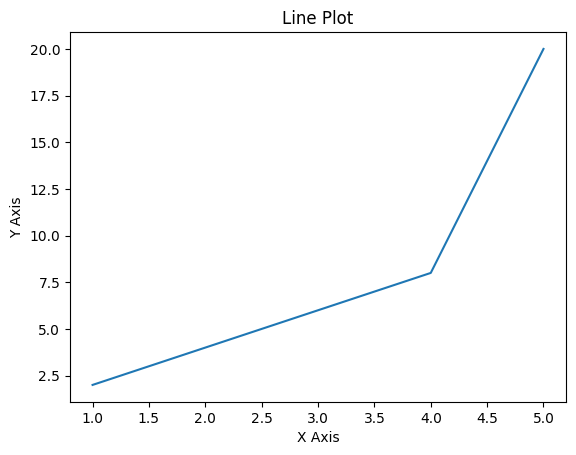

In [3]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 20]

plt.plot(x, y)
plt.xlabel("X Axis")

plt.ylabel("Y Axis")
plt.title("Line Plot")

`seaborn` is a higher-level plotting library built on top of matplotlib that makes it easier to create beautiful and informative statistical plots. `seaborn` has a lot of built-in functions for plotting commonly used statistical plots, such as violin plots, box plots, and heatmaps, which can save you a lot of time and make your plots look more professional.

Here's a simple example of how you could use `seaborn` to create a scatter plot:


Text(0.5, 1.0, 'Scatter Plot')

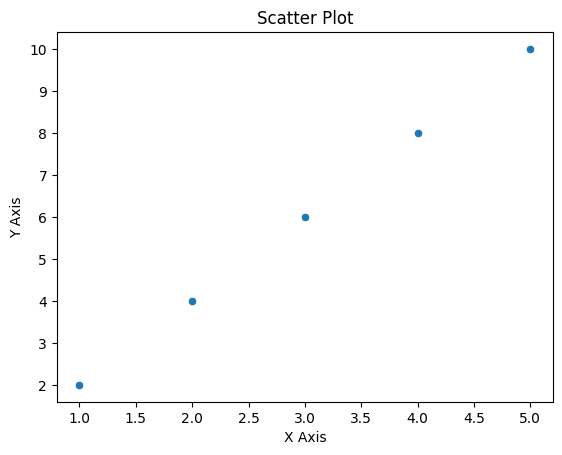

In [4]:
import seaborn as sns

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

sns.scatterplot(x=x, y=y)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Scatter Plot")

Those are just simple plots, but you can check out [`seaborn` gallery](https://seaborn.pydata.org/examples/index.html) for inspiration of more advanced plots.

## Plotting the direct spherification data


Let's load the delaney data again. We can also do it directly from the URL.

In [ ]:
!git clone https://github.com/katerinavr/RENEW_summer_school_week1.git
%cd RENEW_summer_school_week1

In [5]:
import pandas as pd
df = pd.read_csv("/content/RENEW_summer_school_week1/spherification_data.csv")
df.describe() # prints summary statistics for each column

,pH,Calcium Ion Concentration (mM),Time to Gel Formation (seconds),Texture Rating (1-10),Diameter of Spheres (mm),Height of Spheres (mm)
count,9.000000,9.0,9.000000,9.000000,9.000000,9.000000
mean,6.000000,50.0,77.222222,6.777778,4.511111,3.077778
std,1.369306,0.0,22.928027,2.438123,0.671648,0.661018
min,4.000000,50.0,50.000000,3.000000,3.500000,2.000000
25%,5.000000,50.0,60.000000,5.000000,4.000000,2.500000
50%,6.000000,50.0,75.000000,7.000000,4.500000,3.000000
75%,7.000000,50.0,90.000000,9.000000,5.000000,3.500000
max,8.000000,50.0,120.000000,10.000000,5.500000,4.000000


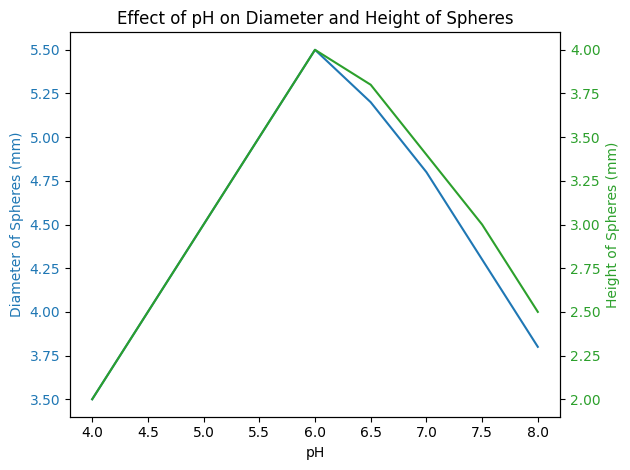

In [7]:
# Plotting with matplotlib
fig, ax1 = plt.subplots()

# Plot Diameter of Spheres
color = 'tab:blue'
ax1.set_xlabel('pH')
ax1.set_ylabel('Diameter of Spheres (mm)', color=color)
ax1.plot(df['pH'], df['Diameter of Spheres (mm)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot Height of Spheres
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Height of Spheres (mm)', color=color)
ax2.plot(df['pH'], df['Height of Spheres (mm)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Effect of pH on Diameter and Height of Spheres')
fig.tight_layout()
plt.show()

Pandas directly lets us plot starting from the DataFrame.

<Axes: xlabel='pH'>

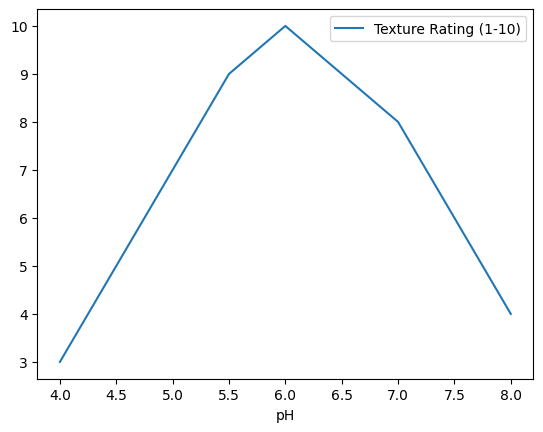

In [11]:
# Plot 'measured log solubility in mols per litre' vs 'Molecular Weight'
df.plot(x='pH', y='Texture Rating (1-10)')


<Axes: ylabel='Frequency'>

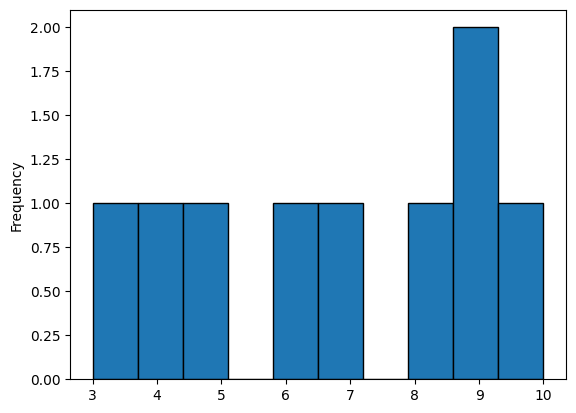

In [29]:
# Plot a histogram of pH
df['Texture Rating (1-10)'].plot(kind='hist', bins=10, edgecolor='black')


<Axes: xlabel='pH', ylabel='Texture Rating (1-10)'>

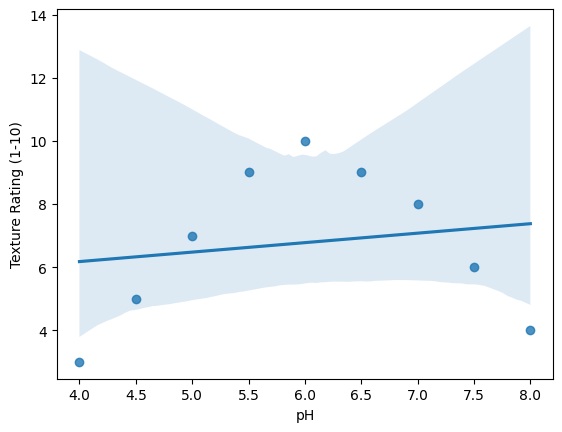

In [30]:
# Scatter plot with regression line
sns.regplot(x='pH', y='Texture Rating (1-10)', data=df)


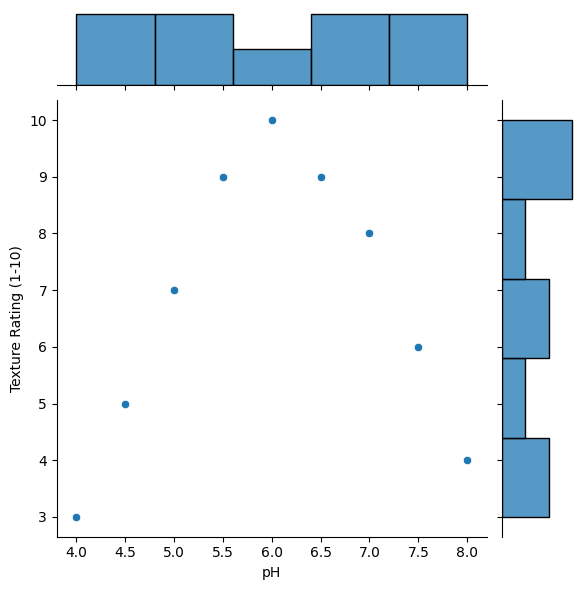

In [34]:
# Joint plot with histograms on the sides
sns.jointplot(x='pH', y='Texture Rating (1-10)', data=df)


<Axes: xlabel='pH'>

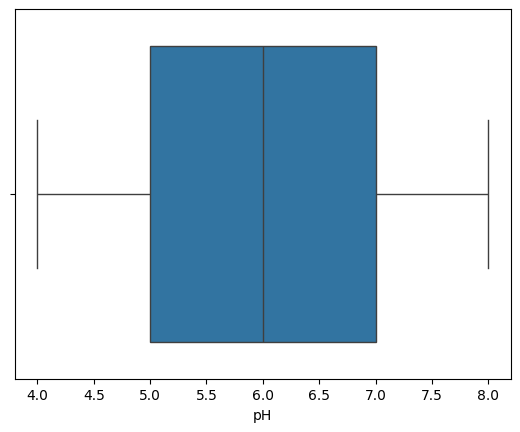

In [31]:
# Box plot to show distribution of 'pH'
sns.boxplot(x='pH', data=df)


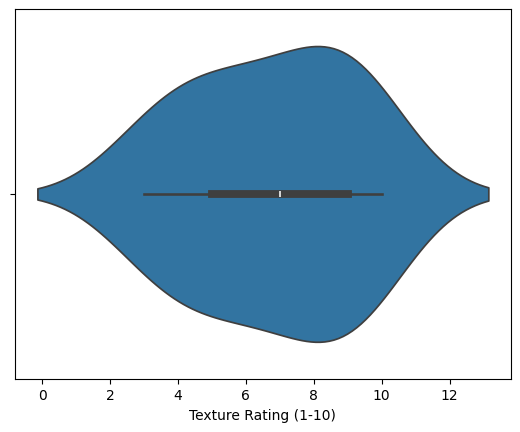

In [32]:
# Violin plot to show the distribution of 'Texture Rating'
sns.violinplot(x='Texture Rating (1-10)', data=df)
plt.show()



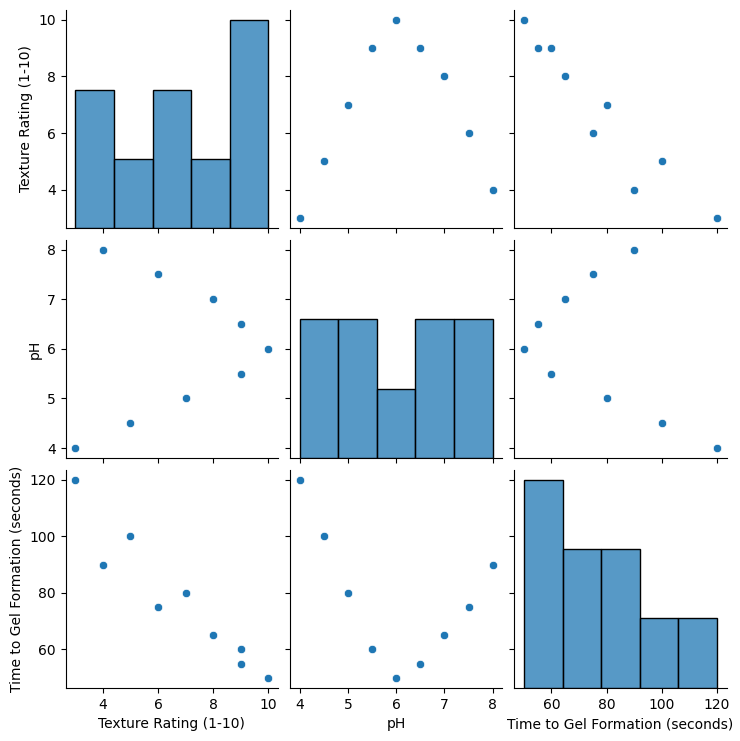

In [33]:
# Pair plot to visualize the relationship between multiple columns
sns.pairplot(df[['Texture Rating (1-10)', 'pH', 'Time to Gel Formation (seconds)']])
plt.show()



# Plotting the viscocity data of the reverse spherification

In [45]:
import pandas as pd
df = pd.read_csv("/content/RENEW_summer_school_week1/sodium_alginate_bath_data.csv")
df#.describe() # prints summary statistics for each column

,Initial Diameter of Spheres (mm),Initial Mass of Spheres (g),Initial Concentration of Sodium Alginate Bath (g/L),Amount of Sodium Alginate Added to Bath (g),Amount of Water Added to Bath (mL),Final Diameter of Spheres (mm),Final Mass of Spheres (g),Microscopy Observations,Final Concentration of Bath (g/L),Viscosity of Sodium Alginate Bath (cP)
0,3.0,0.050,5,5,0,3.5,0.060,Uniform gel network,10.000000,50.000000
1,4.0,0.070,5,0,1000,4.5,0.080,Dense cross-linked structure,2.500000,0.000000
2,3.5,0.060,5,0,500,4.0,0.070,Homogeneous distribution,3.333333,5.555556
3,2.5,0.040,5,0,200,3.0,0.050,Slightly irregular gel formation,4.166667,11.111111
4,4.5,0.080,5,5,0,5.0,0.090,Very dense and uniform structure,10.000000,50.000000
5,3.2,0.055,5,3,0,3.8,0.065,Moderately uniform structure,8.000000,36.666667
6,4.8,0.075,5,0,800,5.0,0.085,Some irregularities observed,2.777778,1.851852
7,3.7,0.065,5,2,0,4.0,0.070,Good cross-linking observed,7.000000,30.000000


<Axes: xlabel='Final Concentration of Bath (g/L)', ylabel='Viscosity of Sodium Alginate Bath (cP)'>

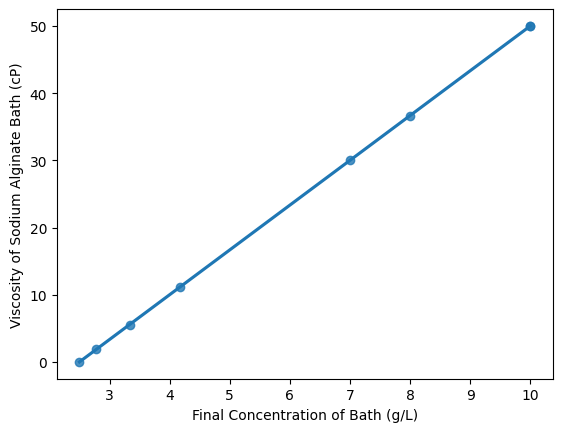

In [46]:
# Scatter plot with regression line
sns.regplot(x='Final Concentration of Bath (g/L)', y='Viscosity of Sodium Alginate Bath (cP)', data=df)

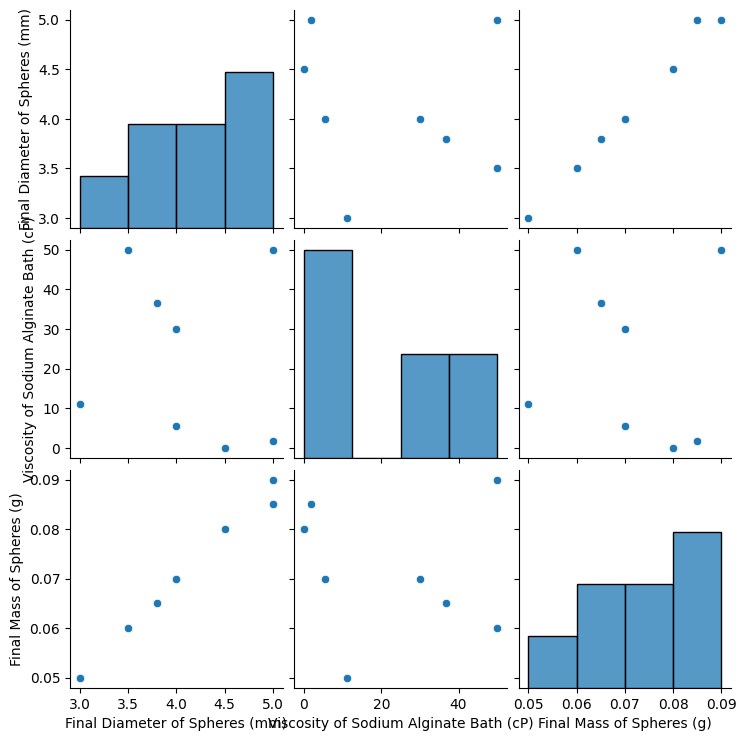

In [48]:
# Pair plot to visualize the relationship between multiple columns
sns.pairplot(df[['Final Diameter of Spheres (mm)', 'Viscosity of Sodium Alginate Bath (cP)', 'Final Mass of Spheres (g)']])
plt.show()